# ANN based Project Part 1: Skin Disease Detection using ANN
Author: Asad Ahmed\
Date Created:  22-08-2023

---
- ### Task
- 1. You are given a dataset in csv format that contains various skin disease images and labels.
- 2. Your task is to understand the dataset and prepare in the right format to be fed in ANN model.
- 3. You are allowed to choose any numbers of layers, neurons, activation functions, batch size and epochs.
- 4. Your main goal is to achieve maximum accuracy without overfitting.
- 5. The predicated output should be also visualised as given in the given example
---

## Importing libraries

In [199]:
# import necessary libraries for ann model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib
import time
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Loading the HMNIST Dataset

In [200]:
data = pd.read_csv('/content/drive/MyDrive/Data Science Bootcamp Resources /Week 06/Day 02/hmnist_28_28_RGB.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


- After Looking at data I have found that it is in pixels form so need to reverse back to image

In [201]:
#checking shape of data
data.shape

(10015, 2353)

x= data.drop("label",axis=1)
y=data[['label']]
y.head()

In [202]:
XX_train = data[data.columns[:-1]]
yy_train = data[['label']]
print(f'XX_train extracted: {XX_train.shape}', f'yy_train extracted: {yy_train.shape}')

XX_train extracted: (10015, 2352) yy_train extracted: (10015, 1)


## Converting into Numpy Array

In [203]:
X = np.array(XX_train)
y = np.array(yy_train)
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [204]:
# Looking into yy_train it has no lable
XX_train.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,192,153,193,195,155,192,197,154,185,202,...,134,173,124,138,183,147,166,185,154,177
1,25,14,30,68,48,75,123,93,126,158,...,82,60,39,55,25,14,28,25,14,27
2,192,138,153,200,145,163,201,142,160,206,...,149,167,129,143,159,124,142,136,104,117
3,38,19,30,95,59,72,143,103,119,171,...,73,44,26,36,25,12,17,25,12,15
4,158,113,139,194,144,174,215,162,191,225,...,201,209,166,185,172,135,149,109,78,92


## Reverse Engineering from Pixels to RGB IMAGE

Extracting First Row & converting into numpy arrow

In [205]:
# getting first row
first_image = XX_train.loc[:0]

#converting first row into numpy array
first_image_array = np.array(first_image)
first_image_array
#reshaping first row into rgb image
first_image_in_rgb = first_image_array.reshape(28,28,3)
# first_image_in_rgb.shape

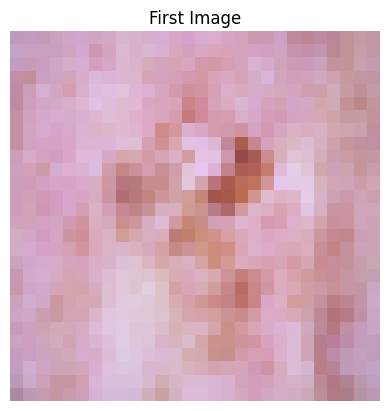

In [206]:
import matplotlib.pyplot as plt

# Display the image
plt.imshow(first_image_in_rgb)
plt.axis('off')  # Optional: Turn off axis labels
plt.title('First Image')
plt.show()

# Spliting into Training and Testing dataset

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Normalizing Dataset using Scaler

In [208]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

In [221]:
X_test[0].shape

(2352,)

In [209]:
# # PCA for dimensionality reduction
# n_components_pca = 6
# pca = PCA(n_components=n_components_pca)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [210]:
# # LDA for dimensionality reduction
# n_components_lda = 6
# lda = LinearDiscriminantAnalysis(n_components=n_components_lda)
# X_train  = lda.fit_transform(X_train, y_train)
# X_test  = lda.transform(X_test)

In [211]:
# # Calculate mean and standard deviation for each feature from 'X_train'
# mean = np.mean(X_train, axis=0)
# std = np.std(X_train, axis=0)

# # Normalize 'X_train' by subtracting the mean and dividing by the standard deviation
# X_train = (X_train - mean) / std

# # Normalize 'X_test' using the same mean and standard deviation from 'X_train'
# X_test = (X_test - mean) / std

In [212]:
# from sklearn.preprocessing import MinMaxScaler

# # Create a MinMaxScaler instance
# scaler = MinMaxScaler()

# # Fit the scaler to your data and transform it
# X_train = scaler.fit_transform(X_train)

# X_test = scaler.transform(X_test)

Checking shape of splited dataset

In [213]:
print(f'X Train:{X_train.shape}, X Test: {X_test.shape}, Y Tain: {y_train.shape}, Y Test: {y_test.shape}')

X Train:(7511, 2352), X Test: (2504, 2352), Y Tain: (7511, 1), Y Test: (2504, 1)


## Building The ANN Model Architecture

In [214]:
annmodel= Sequential([
    Dense(128,activation="relu",input_shape=(2352,)),

    Dense(64,activation="relu"),
    Dense(32,activation="relu"),

    Dense(7,activation="softmax")
])

## Compiling the Model

In [215]:
annmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training the Model

In [216]:
start_time = time.time()
annmodel.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test,y_test))
end_time = time.time()

Epoch 1/5
118/118 [==============================] - 2s 6ms/step - loss: 0.9999 - accuracy: 0.6637 - val_loss: 0.8919 - val_accuracy: 0.6797
Epoch 2/5
118/118 [==============================] - 1s 4ms/step - loss: 0.8405 - accuracy: 0.6990 - val_loss: 0.8866 - val_accuracy: 0.6845
Epoch 3/5
118/118 [==============================] - 0s 4ms/step - loss: 0.7876 - accuracy: 0.7086 - val_loss: 0.8485 - val_accuracy: 0.6913
Epoch 4/5
118/118 [==============================] - 0s 4ms/step - loss: 0.7370 - accuracy: 0.7264 - val_loss: 0.8392 - val_accuracy: 0.7177
Epoch 5/5
118/118 [==============================] - 0s 4ms/step - loss: 0.6902 - accuracy: 0.7412 - val_loss: 0.8244 - val_accuracy: 0.7097


## Evaluating the Model

In [217]:
test_loss , test_accuracy = annmodel.evaluate(X_test, y_test)

print(f'Test Accuracy : {test_accuracy*100}')
print(f'Duration of Training : {end_time-start_time}')

79/79 [==============================] - 0s 2ms/step - loss: 0.8244 - accuracy: 0.7097
Test Accuracy : 70.9664523601532
Duration of Training : 4.300689935684204


## Predicted Output

In [230]:
X_test[0].reshape(-1,784*3).shape

(1, 2352)

In [263]:
a = 5
pred = annmodel.predict(X_test[a].reshape(-1,784*3))
idx = np.where(pred == np.max(pred))[1]
print(idx)

1/1 [==============================] - 0s 56ms/step
[6]


In [264]:
# d = list(set(y_test))
# d
y_test[a]

array([6])

In [254]:
y_test

array([[4],
       [4],
       [2],
       ...,
       [4],
       [4],
       [6]])

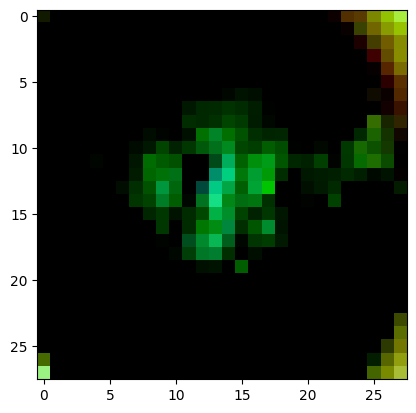

In [233]:
plt.imshow(X_test[0].reshape(28, 28, 3))